In [14]:
import numpy as np
import struct

In [15]:
def load_images(filename):
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        if magic != 2051:
            raise ValueError(f"Invalid magic number {magic} in MNIST image file: {filename}")
        images = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows * cols)
        return images

def load_labels(filename):
    with open(filename, 'rb') as f:
        magic, _ = struct.unpack(">II", f.read(8))
        if magic != 2049:
            raise ValueError(f"Invalid magic number {magic} in MNIST label file: {filename}")
        labels = np.fromfile(f, dtype=np.uint8)
        return labels

In [16]:
train_images = load_images('train-images.idx3-ubyte')
train_labels = load_labels('train-labels.idx1-ubyte')
test_images = load_images('t10k-images.idx3-ubyte')
test_labels = load_labels('t10k-labels.idx1-ubyte')

train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:
mean = np.mean(train_images, axis=0)
std = np.std(train_images, axis=0)

epsilon = 1e-8  # Small constant to avoid division by zero

train_images = (train_images - mean) / (std + epsilon)
test_images = (test_images - mean) / (std + epsilon)

In [18]:
np.save('processed_train_images.npy', train_images)
np.save('processed_train_labels.npy', train_labels)
np.save('processed_test_images.npy', test_images)
np.save('processed_test_labels.npy', test_labels)

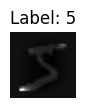

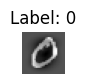

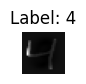

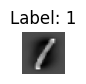

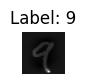

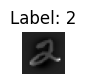

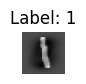

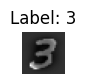

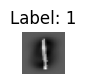

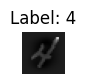

In [19]:
import matplotlib.pyplot as plt

def reshape_matrix_to_images(matrix):
  return matrix.reshape(-1, 28, 28) # -1 infers the number of images automatically

def visualize_images(images, labels, num_images=10):
  plt.figure(figsize=(10, 10))
  for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
    plt.show()
# Reshape the training and testing images
train_images_reshaped = reshape_matrix_to_images(train_images)
test_images_reshaped = reshape_matrix_to_images(test_images)

# Visualize the first 10 images and their labels
visualize_images(train_images_reshaped, train_labels, num_images=10)

In [20]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))

    def relu(self, z):
        return np.maximum(0, z)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

In [21]:
# Example usage:
input_size = 784  # 28x28 pixels
hidden_size = 512
output_size = 10  # 10 digits

nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)

# some example input
example_input = np.random.randn(1, input_size)
output = nn.forward(example_input)
print("Output:", output)

Output: [[0.09506279 0.10508482 0.10309811 0.09564123 0.0921553  0.10258624
  0.100972   0.09995864 0.09987829 0.10556259]]


In [22]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.initialize_weights()

    def initialize_weights(self):
        # Initialize weights with normally distributed values in [0, 1] range
        self.W1 = np.random.rand(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.rand(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def relu(self, z):
        return np.maximum(0, z)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

In [23]:
# Example usage:
input_size = 784  # 28x28 pixels
hidden_size = 512
output_size = 10  # 10 digits

nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)

example_input = np.random.randn(1, input_size)
output = nn.forward(example_input)
print("Output:", output)

Output: [[9.94331627e-01 6.22660050e-15 2.11110128e-15 4.69675521e-23
  8.20417484e-17 3.29528778e-24 4.90417768e-15 3.47803343e-28
  5.66837337e-03 4.32870076e-26]]


In [24]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, init_method='random'):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.init_method = init_method
        self.initialize_weights()

    def initialize_weights(self):
        if self.init_method == 'random':
            # normally distributed values in [0, 1] range
            self.W1 = np.random.rand(self.input_size, self.hidden_size)
            self.b1 = np.zeros((1, self.hidden_size))
            self.W2 = np.random.rand(self.hidden_size, self.output_size)
            self.b2 = np.zeros((1, self.output_size))
        elif self.init_method == 'zeros':
            # zeros
            self.W1 = np.zeros((self.input_size, self.hidden_size))
            self.b1 = np.zeros((1, self.hidden_size))
            self.W2 = np.zeros((self.hidden_size, self.output_size))
            self.b2 = np.zeros((1, self.output_size))
        elif self.init_method == 'large':
            # large values
            self.W1 = np.random.rand(self.input_size, self.hidden_size) * 100
            self.b1 = np.random.rand(1, self.hidden_size) * 100
            self.W2 = np.random.rand(self.hidden_size, self.output_size) * 100
            self.b2 = np.random.rand(1, self.output_size) * 100

    def relu(self, z):
        return np.maximum(0, z)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

In [25]:
# Example usage:
input_size = 784  # 28x28 pixels
hidden_size = 512
output_size = 10  # 10 digits

# Initialize network with zero weights
nn = SimpleNeuralNetwork(input_size, hidden_size, output_size, init_method='zeros')

# Forward pass with one training sample
example_input = train_images[0].reshape(1, -1)  # Use the first training sample
output = nn.forward(example_input)
print("Output with zero weights:", output)

# Initialize network with large weights
nn_large = SimpleNeuralNetwork(input_size, hidden_size, output_size, init_method='large')
output_large = nn_large.forward(example_input)
print("Output with large weights:", output_large)

Output with zero weights: [[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
Output with large weights: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [26]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, init_method='random'):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.init_method = init_method
        self.initialize_weights()

    def initialize_weights(self):
        if self.init_method == 'random':
            self.W1 = np.random.rand(self.input_size, self.hidden_size)
            self.b1 = np.zeros((1, self.hidden_size))
            self.W2 = np.random.rand(self.hidden_size, self.output_size)
            self.b2 = np.zeros((1, self.output_size))
        elif self.init_method == 'zeros':
            self.W1 = np.zeros((self.input_size, self.hidden_size))
            self.b1 = np.zeros((1, self.hidden_size))
            self.W2 = np.zeros((self.hidden_size, self.output_size))
            self.b2 = np.zeros((1, self.output_size))
        elif self.init_method == 'large':
            self.W1 = np.random.rand(self.input_size, self.hidden_size) * 100
            self.b1 = np.random.rand(1, self.hidden_size) * 100
            self.W2 = np.random.rand(self.hidden_size, self.output_size) * 100
            self.b2 = np.random.rand(1, self.output_size) * 100

    def relu(self, z):
        return np.maximum(0, z)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def compute_loss(self, Y, Y_pred):
        m = Y.shape[0]
        log_likelihood = -np.log(Y_pred[range(m), Y])
        loss = np.sum(log_likelihood) / m
        return loss

input_size = 784  # 28x28 pixels
hidden_size = 512
output_size = 10  # 10 digits

# random weights
nn = SimpleNeuralNetwork(input_size, hidden_size, output_size, init_method='random')

# Forward pass with some training samples
example_input = train_images[:5]  # Use the first 5 training samples
example_labels = train_labels[:5]  # Corresponding labels

# predictions
output = nn.forward(example_input)

# initial loss
initial_loss = nn.compute_loss(example_labels, output)
print("Initial loss with random weights:", initial_loss)

Initial loss with random weights: 223.10731282431775


In [28]:
import numpy as np
import pickle

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, init_method='he'):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.init_method = init_method
        self.initialize_weights()

    def initialize_weights(self):
        if self.init_method == 'random':
            self.W1 = np.random.rand(self.input_size, self.hidden_size)
            self.b1 = np.zeros((1, self.hidden_size))
            self.W2 = np.random.rand(self.hidden_size, self.output_size)
            self.b2 = np.zeros((1, self.output_size))
        elif self.init_method == 'zeros':
            self.W1 = np.zeros((self.input_size, self.hidden_size))
            self.b1 = np.zeros((1, self.hidden_size))
            self.W2 = np.zeros((self.hidden_size, self.output_size))
            self.b2 = np.zeros((1, self.output_size))
        elif self.init_method == 'he':
            self.W1 = np.random.randn(self.input_size, self.hidden_size) * np.sqrt(2. / self.input_size)
            self.b1 = np.zeros((1, self.hidden_size))
            self.W2 = np.random.randn(self.hidden_size, self.output_size) * np.sqrt(2. / self.hidden_size)
            self.b2 = np.zeros((1, self.output_size))

    def relu(self, z):
        return np.maximum(0, z)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def compute_loss(self, Y, Y_pred):
        m = Y.shape[0]
        log_likelihood = -np.log(Y_pred[range(m), Y])
        loss = np.sum(log_likelihood) / m
        return loss

    def backward(self, X, Y):
        m = Y.shape[0]
        Y_one_hot = np.zeros((m, self.output_size))
        Y_one_hot[range(m), Y] = 1
        dZ2 = self.a2 - Y_one_hot
        dW2 = np.dot(self.a1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * (self.z1 > 0)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        return dW1, db1, dW2, db2

    def update_parameters(self, dW1, db1, dW2, db2, learning_rate):
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X_train, Y_train, X_val, Y_val, epochs=100, batch_size=32, learning_rate=0.001):
        m = X_train.shape[0]
        validation_losses = []

        for epoch in range(epochs):
            permutation = np.random.permutation(m)
            X_train = X_train[permutation]
            Y_train = Y_train[permutation]

            for i in range(0, m, batch_size):
                X_batch = X_train[i:i+batch_size]
                Y_batch = Y_train[i:i+batch_size]
                Y_pred = self.forward(X_batch)
                loss = self.compute_loss(Y_batch, Y_pred)
                dW1, db1, dW2, db2 = self.backward(X_batch, Y_batch)
                self.update_parameters(dW1, db1, dW2, db2, learning_rate)

            val_pred = self.forward(X_val)
            val_loss = self.compute_loss(Y_val, val_pred)
            validation_losses.append(val_loss)
            print(f"Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss:.4f}")

        with open('model_state.pkl', 'wb') as f:
            pickle.dump(self, f)
        with open('validation_losses.pkl', 'wb') as f:
            pickle.dump(validation_losses, f)

        return validation_losses

# Split the data into training and validation sets (75% training, 25% validation)
split_index = int(0.75 * train_images.shape[0])
X_train, X_val = train_images[:split_index], train_images[split_index:]
Y_train, Y_val = train_labels[:split_index], train_labels[split_index:]

# Initialize network with He initialization
nn = SimpleNeuralNetwork(input_size, hidden_size, output_size, init_method='he')

# Train the network
validation_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=30, batch_size=32, learning_rate=0.001)


Epoch 1/100, Validation Loss: 0.5861
Epoch 2/100, Validation Loss: 0.4407
Epoch 3/100, Validation Loss: 0.3819
Epoch 4/100, Validation Loss: 0.3477
Epoch 5/100, Validation Loss: 0.3247
Epoch 6/100, Validation Loss: 0.3074
Epoch 7/100, Validation Loss: 0.2942
Epoch 8/100, Validation Loss: 0.2824
Epoch 9/100, Validation Loss: 0.2735
Epoch 10/100, Validation Loss: 0.2652
Epoch 11/100, Validation Loss: 0.2582
Epoch 12/100, Validation Loss: 0.2525
Epoch 13/100, Validation Loss: 0.2472


KeyboardInterrupt: 